In [1]:
#Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

In [2]:
# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

In [3]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1


In [4]:
# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

In [10]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import seaborn as sns
import math

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.model_selection import cross_val_score
from math import sqrt  # for root mean-squared error calculation

%matplotlib inline   
import matplotlib.pyplot as plt


In [6]:
boston_input = pd.read_csv('boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [7]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB
None


In [8]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [9]:
print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())



Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.

In [10]:
boston.skew(axis=0)

crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rooms      0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
lstat      0.906460
mv         1.110912
dtype: float64

In [11]:
boston.kurtosis(axis=0)

crim       37.130509
zn          4.031510
indus      -1.233540
chas        9.638264
nox        -0.064667
rooms       1.891500
age        -0.967716
dis         0.487941
rad        -0.867232
tax        -1.142408
ptratio    -0.285091
lstat       0.493240
mv          1.516783
dtype: float64

In [12]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [13]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [14]:
#standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

StandardScaler()
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]


In [15]:

# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

In [16]:

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


In [17]:
# Convert prelim_model_data to a dataframe
df = pd.DataFrame(prelim_model_data,index=boston.index,columns=boston.columns)
df

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48


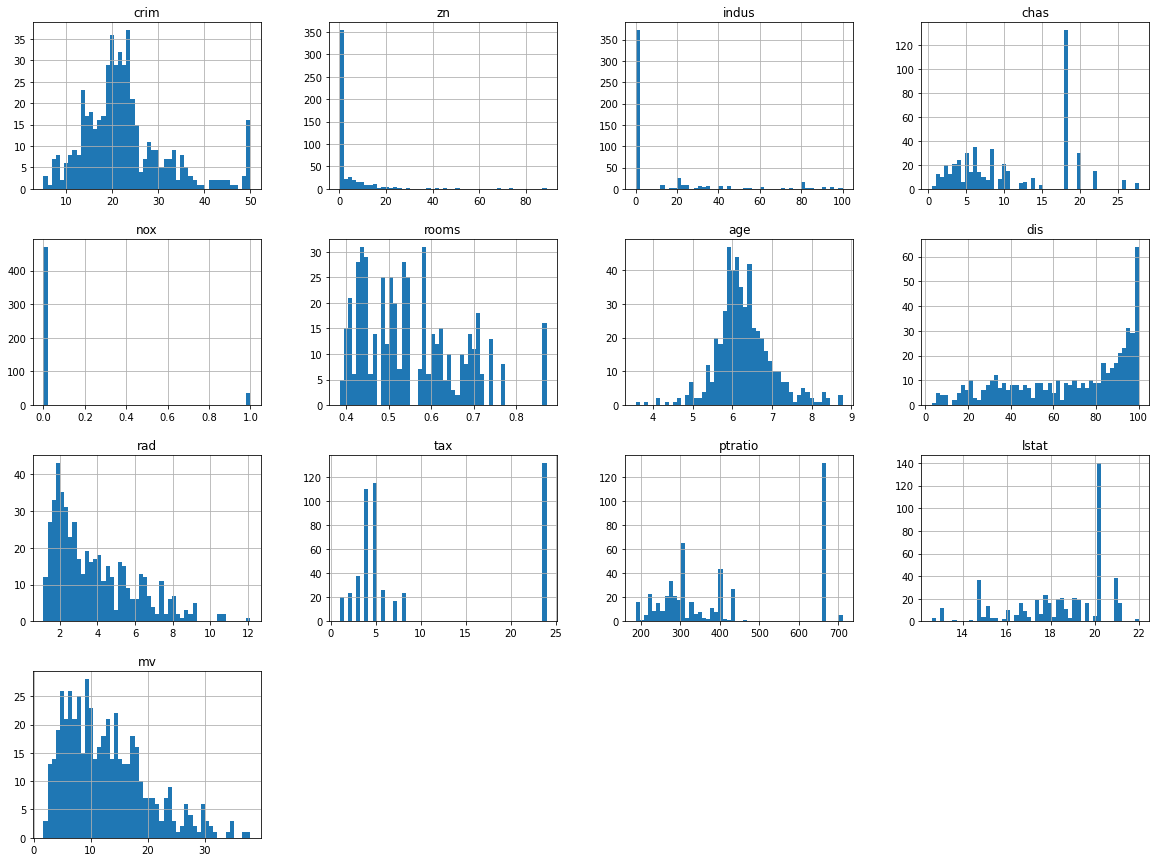

In [18]:
# EDA on the boston housing study data
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

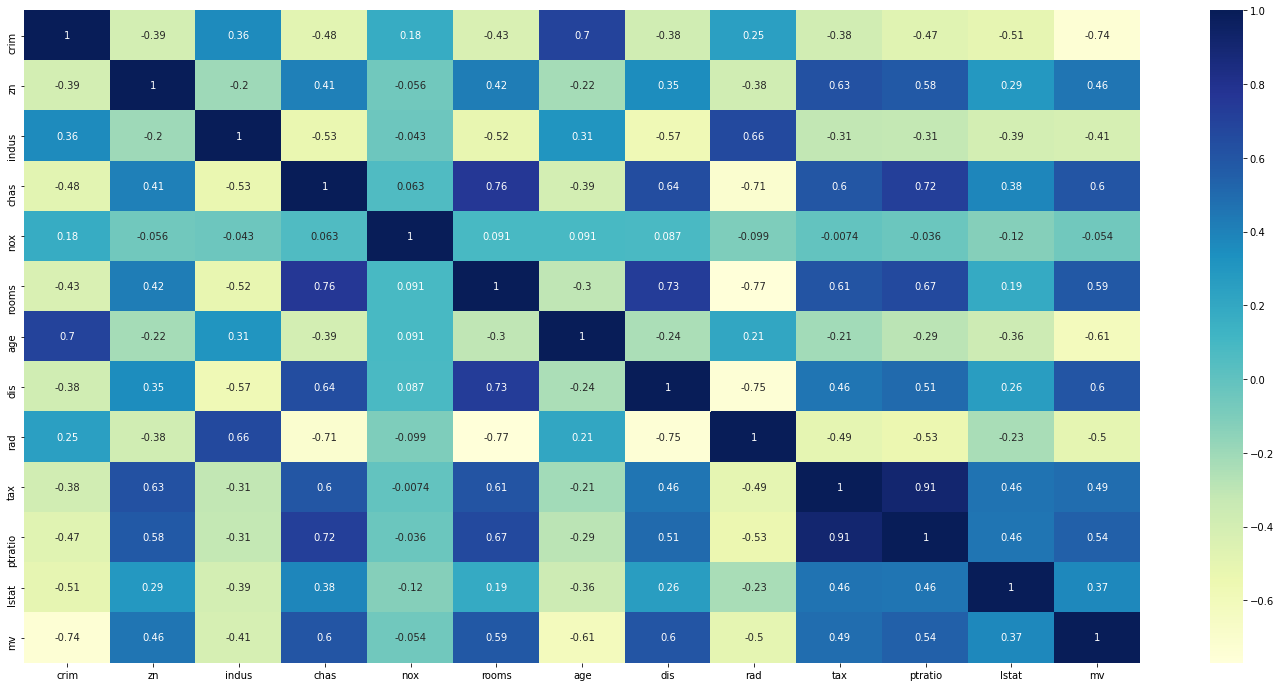

In [19]:
# Heatmap based on correlations among the variables
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu", )

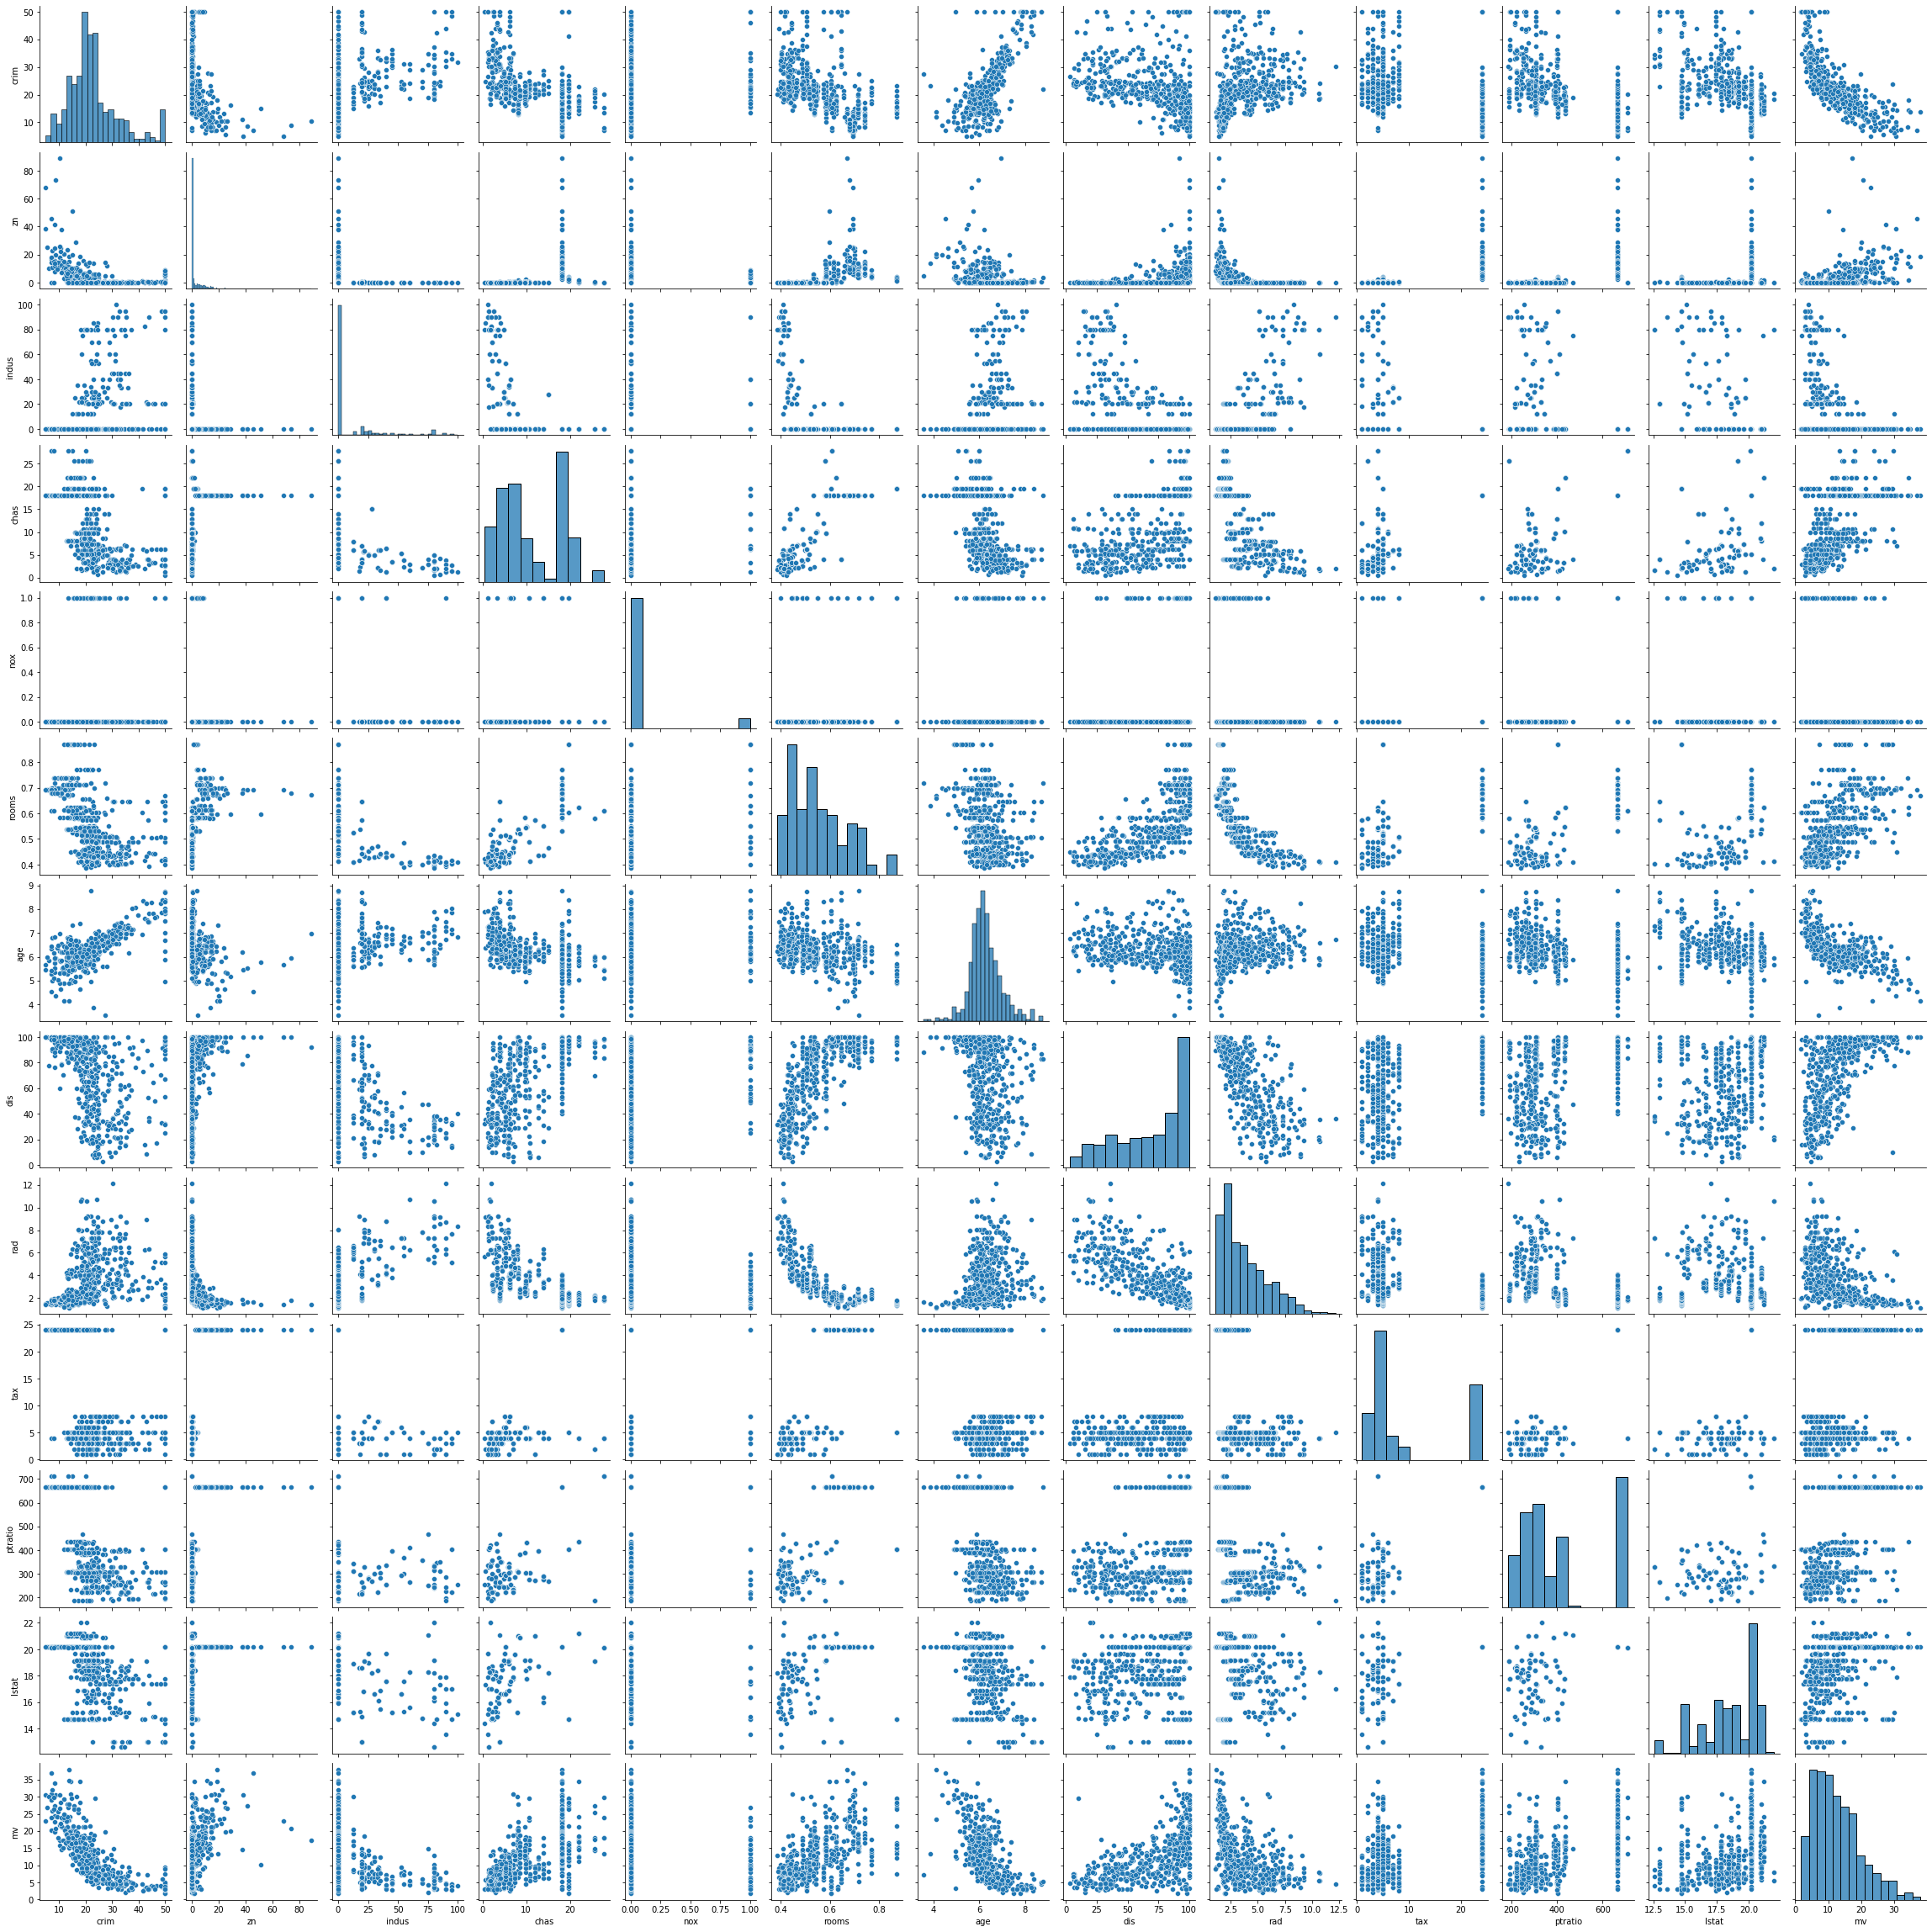

In [20]:
# Create a pairwise scatter plot 
sns.pairplot(df,height = 2.5)
plt.show();

In [21]:
# Create the train, test data based on 70-30 split of the data
# Use all the explanatory variables with exception of neighborhood

explainatoryVar = ["crim","zn","indus","chas","nox","rooms","age","dis","rad","tax","ptratio","lstat"]
responseVar = ["mv"]

X = df[explainatoryVar]
y = df[responseVar]

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.03)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(354, 12) (354, 1)
(16, 12) (16, 1)


In [22]:
############################################
#  Linear Regression  - Response var: mv   #
###########################################

# using cross validation design
lin_reg = LinearRegression()

folds = KFold(n_splits = 3, shuffle = True, random_state = 50)

hyper_params = [{'n_features_to_select': list(range(1, 12))}]
rfe = RFE(lin_reg)  

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.4s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.012316,0.001121,0.003111,0.000107,1,{'n_features_to_select': 1},0.333270,0.411025,0.205537,0.316610,0.084713,11,0.353485,0.293877,0.394285,0.347216,0.041230
1,0.009781,0.000444,0.002769,0.000134,2,{'n_features_to_select': 2},0.531524,0.603963,0.472814,0.536100,0.053639,10,0.572461,0.522260,0.586638,0.560453,0.027620
2,0.006799,0.000400,0.001975,0.000006,3,{'n_features_to_select': 3},0.530707,0.609554,0.474288,0.538183,0.055475,9,0.573892,0.529979,0.596403,0.566758,0.027583
3,0.006148,0.000049,0.002031,0.000044,4,{'n_features_to_select': 4},0.539580,0.697085,0.476188,0.570951,0.092869,8,0.580752,0.659326,0.596693,0.612257,0.033913
4,0.005726,0.000069,0.001987,0.000014,5,{'n_features_to_select': 5},0.650987,0.697667,0.634802,0.661152,0.026652,5,0.692711,0.659373,0.692506,0.681530,0.015668
5,0.005972,0.000306,0.002219,0.000262,6,{'n_features_to_select': 6},0.637563,0.702271,0.598317,0.646050,0.042861,7,0.695915,0.664116,0.716209,0.692080,0.021439
6,0.006296,0.000750,0.002788,0.000415,7,{'n_features_to_select': 7},0.649151,0.704829,0.599520,0.651166,0.043016,6,0.704080,0.664300,0.716298,0.694893,0.022200
7,0.006006,0.000088,0.002735,0.000064,8,{'n_features_to_select': 8},0.673557,0.725870,0.594095,0.664507,0.054176,4,0.733884,0.698863,0.719702,0.717483,0.014383
8,0.004065,0.000216,0.002096,0.000075,9,{'n_features_to_select': 9},0.674258,0.726231,0.623648,0.674712,0.041880,3,0.734533,0.699034,0.746662,0.726743,0.020209
9,0.003507,0.000040,0.002140,0.000050,10,{'n_features_to_select': 10},0.676489,0.730166,0.624792,0.677149,0.043021,2,0.736572,0.700320,0.748671,0.728521,0.020544


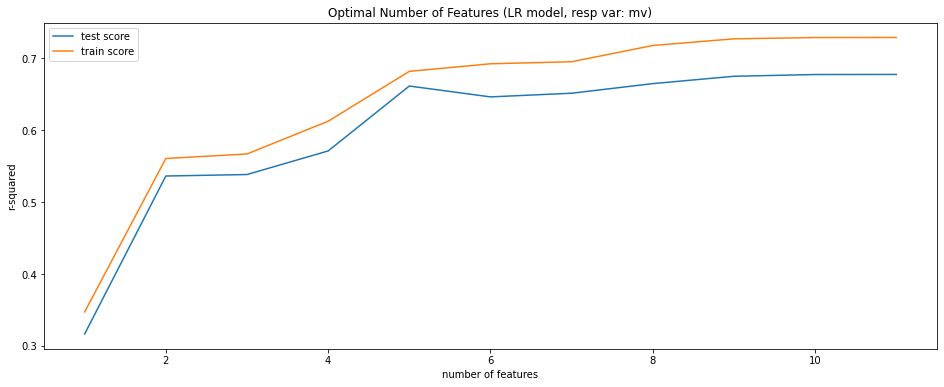

In [23]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features (LR model, resp var: mv)")
plt.legend(['test score', 'train score'], loc='upper left')

In [26]:
# print the best estimator details
print("Optimal number of features : %d" % model_cv.best_estimator_.n_features_)
features=list(X.columns[model_cv.best_estimator_.support_])
print(features)
print('ranking of features:')
model_cv.best_estimator_.ranking_

Optimal number of features : 11
['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad', 'tax', 'lstat']
ranking of features:


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [27]:
print('coefficient of determination - Linear Regression Model (Training Data + resp var: mv):', model_cv.best_estimator_.score(X_train,y_train))
print('coefficient of determination - Linear Regression Model (Test Data + + resp var: mv):', model_cv.best_estimator_.score(X_test,y_test))

coefficient of determination - Linear Regression Model (Training Data + resp var: mv): 0.7229578486565664
coefficient of determination - Linear Regression Model (Test Data + + resp var: mv): 0.5604618596389145


In [28]:
print('Best Linear Regression model (response var: mv): ')
model_cv.best_estimator_

Best Linear Regression model (response var: mv): 


RFE(estimator=LinearRegression(), n_features_to_select=11)

In [29]:
print('RMSE values using best linear regression model (Response var: mv): ')
#use the best model to compute RMSE using CV design
lin_reg = model_cv.best_estimator_ ## Best LR model

lin_reg_scores  = cross_val_score(lin_reg, X, y, scoring=('neg_mean_squared_error'), cv=folds)
lin_rmse_scores = np.sqrt(-lin_reg_scores)
lin_rmse_scores

RMSE values using best linear regression model (Response var: mv): 


array([3.93871965, 3.93828247, 3.83996663])

In [32]:
##############################################
#  Ridge Regression -- Response Variable: mv #
#############################################

# using cross validation design
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

hyper_params = [{'alpha': [0, 0.1, 0.5, 1,10,50,100,200, 230, 250,265, 270, 275, 290, 300, 500]}]
model = Ridge() 

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.6s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.003607,0.000357,0.104472,1.439979e-01,0,{'alpha': 0},0.672486,0.656617,0.749774,0.692959,0.040693,6,0.736637,0.751896,0.703909,0.730814,0.020018
1,0.003291,0.000108,0.002571,5.783386e-05,0.1,{'alpha': 0.1},0.672562,0.656639,0.750147,0.693116,0.040848,5,0.736637,0.751893,0.703902,0.730811,0.020020
2,0.003029,0.000288,0.002323,2.589648e-04,0.5,{'alpha': 0.5},0.672870,0.656551,0.751192,0.693538,0.041309,4,0.736631,0.751863,0.703825,0.730773,0.020044
3,0.002486,0.000100,0.002126,1.338590e-04,1,{'alpha': 1},0.673239,0.656320,0.752105,0.693888,0.041741,3,0.736618,0.751831,0.703731,0.730727,0.020074
4,0.002872,0.000234,0.002363,3.244654e-05,10,{'alpha': 10},0.676891,0.651648,0.760455,0.696331,0.046499,1,0.735704,0.751433,0.702410,0.729849,0.020437
5,0.002503,0.000216,0.001983,9.394842e-05,50,{'alpha': 50},0.678405,0.638974,0.767505,0.694961,0.053763,2,0.729254,0.748721,0.694228,0.724068,0.022547
6,0.002364,0.000042,0.001859,1.056780e-05,100,{'alpha': 100},0.676659,0.631467,0.766325,0.691484,0.056045,7,0.723043,0.746130,0.687256,0.718810,0.024221
7,0.002345,0.000006,0.001899,3.205171e-05,200,{'alpha': 200},0.673907,0.624659,0.763591,0.687386,0.057514,8,0.715983,0.743084,0.679982,0.713016,0.025847
8,0.002397,0.000011,0.001915,1.267137e-05,230,{'alpha': 230},0.673346,0.623459,0.763029,0.686611,0.057746,9,0.714613,0.742452,0.678604,0.711890,0.026137
9,0.002358,0.000040,0.001847,6.486660e-06,250,{'alpha': 250},0.673022,0.622773,0.762703,0.686166,0.057877,10,0.713815,0.742074,0.677802,0.711230,0.026303


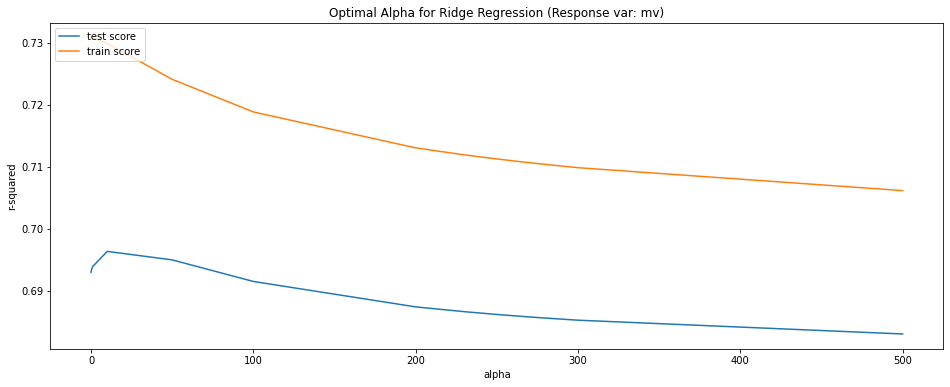

In [33]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('alpha')
plt.ylabel('r-squared')
plt.title("Optimal Alpha for Ridge Regression (Response var: mv)")
plt.legend(['test score', 'train score'], loc='upper left')

In [34]:
print('coefficient of determination - Ridge Regression Model (Training Data + resp var: mv):', model_cv.best_estimator_.score(X_train,y_train))
print('coefficient of determination - Ridge Regression Model (Test Data + resp var: mv):', model_cv.best_estimator_.score(X_test,y_test))

coefficient of determination - Ridge Regression Model (Training Data + resp var: mv): 0.7246814948877556
coefficient of determination - Ridge Regression Model (Test Data + resp var: mv): 0.5827317570033554


In [35]:
print('Best Ridge model (response var: mv): ')
model_cv.best_estimator_

Best Ridge model (response var: mv): 


Ridge(alpha=10)

In [36]:
print('RMSE values using best Ridge Regression model (Response var: mv): ')
#use the best model to compute RMSE using CV design
ridge_reg = model_cv.best_estimator_ ## Best Ridge model 

ridge_reg_scores  = cross_val_score(ridge_reg, X, y, scoring=('neg_mean_squared_error'), cv=folds)
ridge_rmse_scores = np.sqrt(-ridge_reg_scores)
ridge_rmse_scores

RMSE values using best Ridge Regression model (Response var: mv): 


array([3.64650471, 3.99485348, 4.09343332])

In [37]:
ridge_reg.coef_

array([[-0.35536716,  0.06031961,  0.02329898,  0.07148621,  0.26515292,
        -0.10510513, -2.0936899 ,  0.06994991, -0.37372252,  0.14088493,
        -0.00578664, -0.17472121]])

In [38]:
ridge_reg.intercept_

array([33.48849558])

In [39]:
#############################################
#  Lasso Regression -- Response Variable: mv #
#############################################

# using cross validation design
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

hyper_params = [{'alpha': [0.01,0.02, 0.024, 0.025, 0.026, 0.03,0.05,0.1,0.5,1.0,10,20,50,100]}]
model = Lasso() 

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.3s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.004633,0.000698,0.003246,0.000099,0.01,{'alpha': 0.01},0.673818,0.655920,0.752525,0.694088,0.041962,8,0.736582,0.751708,0.703413,0.730568,0.020170
1,0.003851,0.000064,0.002806,0.000269,0.02,{'alpha': 0.02},0.675077,0.655079,0.753431,0.694529,0.042442,7,0.736431,0.751673,0.703381,0.730495,0.020157
2,0.003409,0.000070,0.002554,0.000008,0.024,{'alpha': 0.024},0.675536,0.654737,0.753785,0.694686,0.042643,6,0.736343,0.751653,0.703363,0.730453,0.020150
3,0.002898,0.000322,0.002106,0.000224,0.025,{'alpha': 0.025},0.675646,0.654650,0.753872,0.694723,0.042694,5,0.736319,0.751647,0.703357,0.730441,0.020148
4,0.002523,0.000030,0.001939,0.000013,0.026,{'alpha': 0.026},0.675755,0.654564,0.753960,0.694760,0.042745,4,0.736293,0.751641,0.703352,0.730429,0.020146
5,0.002547,0.000056,0.001899,0.000038,0.03,{'alpha': 0.03},0.676175,0.654216,0.754307,0.694899,0.042953,3,0.736181,0.751616,0.703328,0.730375,0.020136
6,0.002373,0.000010,0.001912,0.000091,0.05,{'alpha': 0.05},0.677885,0.652423,0.755972,0.695426,0.044056,1,0.735378,0.751431,0.703158,0.729989,0.020072
7,0.002617,0.000172,0.001876,0.000021,0.1,{'alpha': 0.1},0.678576,0.647545,0.759622,0.695248,0.047250,2,0.734340,0.750563,0.702362,0.729088,0.020025
8,0.002387,0.000040,0.001944,0.000116,0.5,{'alpha': 0.5},0.672369,0.607718,0.762269,0.680786,0.063375,9,0.714386,0.732153,0.676874,0.707804,0.023043
9,0.002453,0.000074,0.001954,0.000146,1,{'alpha': 1.0},0.669251,0.604772,0.752046,0.675356,0.060279,10,0.695244,0.728321,0.657014,0.693526,0.029136


In [40]:
print('coefficient of determination - Lasso Regression Model (Training Data + resp var: mv ):', model_cv.best_estimator_.score(X_train,y_train))
print('coefficient of determination - Lasso Regression Model (Test Data + resp var: mv):', model_cv.best_estimator_.score(X_test,y_test))

coefficient of determination - Lasso Regression Model (Training Data + resp var: mv ): 0.7245449960312655
coefficient of determination - Lasso Regression Model (Test Data + resp var: mv): 0.5727804826960362


In [41]:
print('Best Lasso model (response var: mv): ')
model_cv.best_estimator_


Best Lasso model (response var: mv): 


Lasso(alpha=0.05)

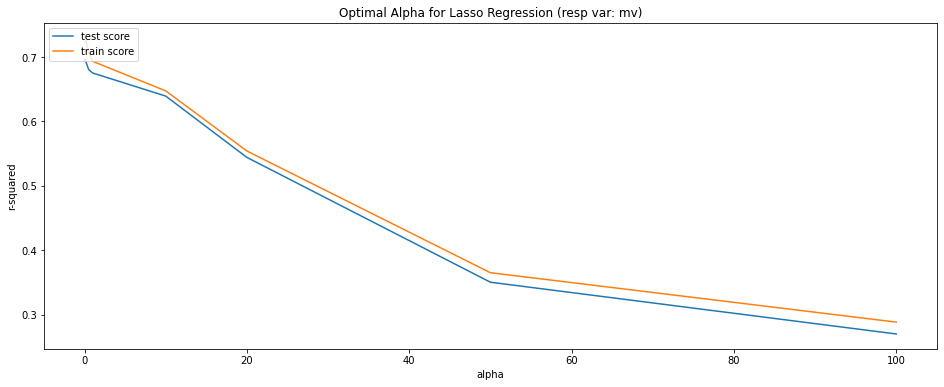

In [42]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('alpha')
plt.ylabel('r-squared')
plt.title("Optimal Alpha for Lasso Regression (resp var: mv)")
plt.legend(['test score', 'train score'], loc='upper left')

In [43]:
print('RMSE values using best Lasso Regression model (Response var: mv): ')
#use the best model to compute RMSE using CV design
lasso_reg = model_cv.best_estimator_ ## Best Ridge model

lasso_reg_scores  = cross_val_score(lasso_reg, X, y, scoring=('neg_mean_squared_error'), cv=folds)
lasso_rmse_scores = np.sqrt(-lasso_reg_scores)
lasso_rmse_scores

RMSE values using best Lasso Regression model (Response var: mv): 


array([3.64088578, 3.99168728, 4.09138663])

In [45]:
lasso_reg.intercept_

array([33.08930777])

In [44]:
for coef, col in enumerate(X_train.columns):
    print(f'{col}:  {lasso_reg.coef_[coef]}')

crim:  -0.3479670034754634
zn:  0.06055810168199404
indus:  0.022338231991192423
chas:  0.07120021718193514
nox:  0.0
rooms:  -0.0
age:  -2.1427155188934908
dis:  0.07124152114451476
rad:  -0.34150451722473496
tax:  0.13676119450971752
ptratio:  -0.005544940907889401
lstat:  -0.16148932059980323


In [46]:
########################################################################################
############                Response variable: log(mv)                         #########
########################################################################################

In [47]:
explainatoryVar = ["crim","zn","indus","chas","nox","rooms","age","dis","rad","tax","ptratio","lstat"]
responseVar = ["mv"]

X = df[explainatoryVar]
# response variable is log median value of homes in thousands of 1970 dollars
y = np.log(df[responseVar])

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.03)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(354, 12) (354, 1)
(16, 12) (16, 1)


In [48]:
################################################
#  Linear Regression  - Response var: log(mv)  #
################################################

# using cross validation design
lin_reg = LinearRegression()

folds = KFold(n_splits = 3, shuffle = True, random_state = 50)

hyper_params = [{'n_features_to_select': list(range(1, 12))}]
rfe = RFE(lin_reg)  


model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.4s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.012008,0.001198,0.003093,0.000165,1,{'n_features_to_select': 1},0.416655,0.295099,0.275612,0.329122,0.062404,11,0.290606,0.351298,0.364991,0.335632,0.032325
1,0.009667,0.000271,0.002838,0.000110,2,{'n_features_to_select': 2},0.606996,0.402002,0.617004,0.542000,0.099078,10,0.550068,0.637711,0.536926,0.574901,0.044736
2,0.007143,0.000800,0.002082,0.000100,3,{'n_features_to_select': 3},0.614345,0.395151,0.623078,0.544192,0.105448,9,0.551458,0.645520,0.537952,0.578310,0.047843
3,0.006131,0.000095,0.001997,0.000035,4,{'n_features_to_select': 4},0.620775,0.755926,0.758195,0.711632,0.064252,8,0.555213,0.757318,0.767153,0.693228,0.097674
4,0.005562,0.000007,0.001947,0.000003,5,{'n_features_to_select': 5},0.709328,0.757779,0.759997,0.742368,0.023380,6,0.782416,0.757527,0.767435,0.769126,0.010231
5,0.005975,0.000663,0.002081,0.000106,6,{'n_features_to_select': 6},0.699057,0.756088,0.760417,0.738521,0.027961,7,0.785255,0.757582,0.767918,0.770252,0.011418
6,0.006832,0.000774,0.002925,0.000155,7,{'n_features_to_select': 7},0.696971,0.754105,0.802590,0.751222,0.043167,5,0.791219,0.762587,0.790729,0.781512,0.013383
7,0.005614,0.000498,0.002453,0.000220,8,{'n_features_to_select': 8},0.726991,0.765065,0.810481,0.767512,0.034129,1,0.822512,0.802878,0.793676,0.806355,0.012026
8,0.004085,0.000114,0.002026,0.000092,9,{'n_features_to_select': 9},0.725839,0.760836,0.809103,0.765259,0.034136,3,0.824654,0.805974,0.793982,0.808203,0.012621
9,0.004058,0.000111,0.002225,0.000260,10,{'n_features_to_select': 10},0.725257,0.758779,0.811834,0.765290,0.035643,2,0.824770,0.806285,0.794489,0.808515,0.012462


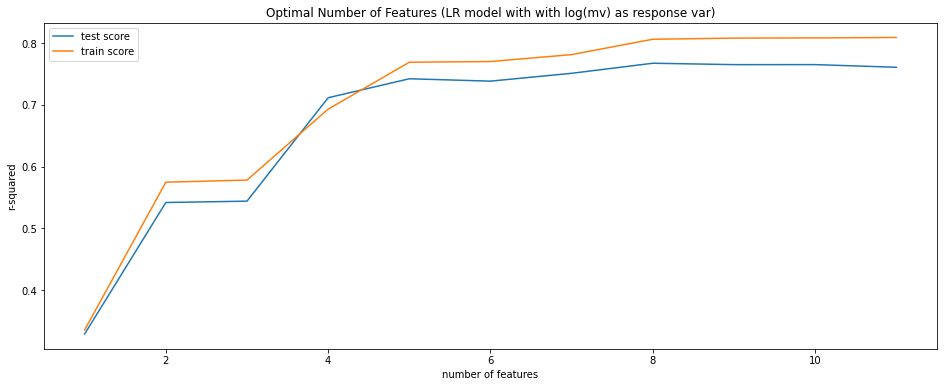

In [49]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features (LR model with with log(mv) as response var)")
plt.legend(['test score', 'train score'], loc='upper left')

In [50]:
print("Optimal number of features : %d" % model_cv.best_estimator_.n_features_)
features=list(X.columns[model_cv.best_estimator_.support_])
print(features)
print('ranking of features:')
model_cv.best_estimator_.ranking_

Optimal number of features : 8
['crim', 'nox', 'rooms', 'age', 'dis', 'rad', 'tax', 'lstat']
ranking of features:


array([1, 2, 4, 3, 1, 1, 1, 1, 1, 1, 5, 1])

In [51]:
print('Best Linear Regression model (response var: log(mv)): ')
model_cv.best_estimator_


Best Linear Regression model (response var: log(mv)): 


RFE(estimator=LinearRegression(), n_features_to_select=8)

In [52]:
print('coefficient of determination - Linear Regression Model (Training Data + resp var: log(mv)):', model_cv.best_estimator_.score(X_train,y_train))
print('coefficient of determination - Linear Regression Model (Test Data + resp var: log(mv)):', model_cv.best_estimator_.score(X_test,y_test))

coefficient of determination - Linear Regression Model (Training Data + resp var: log(mv)): 0.8009012816641836
coefficient of determination - Linear Regression Model (Test Data + resp var: log(mv)): 0.510139441794164


In [53]:
print('RMSE values using best linear regression model (Response var: log(mv)): ')
#use the best model to compute RMSE using CV design
lin_reg = model_cv.best_estimator_ ## Best LR model

#Compute the RMSE scores using cross-validation design -- linear regression with log(mv)
lin_reg_scores  = cross_val_score(rfe, X, y, scoring=('neg_mean_squared_error'), cv=folds)
lin_rmse_scores = np.sqrt(-lin_reg_scores)
lin_rmse_scores


RMSE values using best linear regression model (Response var: log(mv)): 


array([0.28231815, 0.27379264, 0.30321374])

In [54]:
###################################################
#  Ridge Regression -- Response Variable: log(mv) #
##################################################

# using cross validation design
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

hyper_params = [{'alpha': [0, 0.1, 0.5, 1,10,50,100,200, 230, 250,265, 270, 275, 290, 300, 500]}]
model = Ridge() 

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.4s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.004249,0.000253,0.003121,0.000236,0,{'alpha': 0},0.787757,0.754080,0.738800,0.760212,0.020452,15,0.794077,0.813885,0.819637,0.809200,0.010948
1,0.003893,0.000063,0.003350,0.000465,0.1,{'alpha': 0.1},0.788039,0.754121,0.739330,0.760497,0.020390,14,0.794055,0.813864,0.819612,0.809177,0.010947
2,0.003735,0.000323,0.002850,0.000293,0.5,{'alpha': 0.5},0.788636,0.754017,0.740473,0.761042,0.020280,12,0.793823,0.813643,0.819380,0.808949,0.010949
3,0.003454,0.000075,0.002630,0.000061,1,{'alpha': 1},0.789005,0.753758,0.741363,0.761375,0.020182,8,0.793555,0.813385,0.819143,0.808694,0.010960
4,0.002662,0.000157,0.002034,0.000086,10,{'alpha': 10},0.791608,0.750145,0.751657,0.764470,0.019200,3,0.792174,0.812336,0.817585,0.807365,0.010953
5,0.002491,0.000018,0.001971,0.000009,50,{'alpha': 50},0.792528,0.740644,0.766350,0.766508,0.021182,1,0.787492,0.810658,0.810306,0.802819,0.010839
6,0.002623,0.000123,0.002227,0.000356,100,{'alpha': 100},0.790720,0.734924,0.769452,0.765032,0.022992,2,0.783009,0.809062,0.803546,0.798539,0.011210
7,0.002407,0.000045,0.001977,0.000120,200,{'alpha': 200},0.788013,0.730146,0.769338,0.762499,0.024114,4,0.777800,0.807024,0.796147,0.793657,0.012060
8,0.002369,0.000010,0.001908,0.000020,230,{'alpha': 230},0.787413,0.729433,0.769039,0.761962,0.024194,5,0.776748,0.806581,0.794749,0.792693,0.012266
9,0.002375,0.000010,0.001905,0.000024,250,{'alpha': 250},0.787045,0.729058,0.768832,0.761645,0.024213,6,0.776124,0.806313,0.793941,0.792126,0.012391


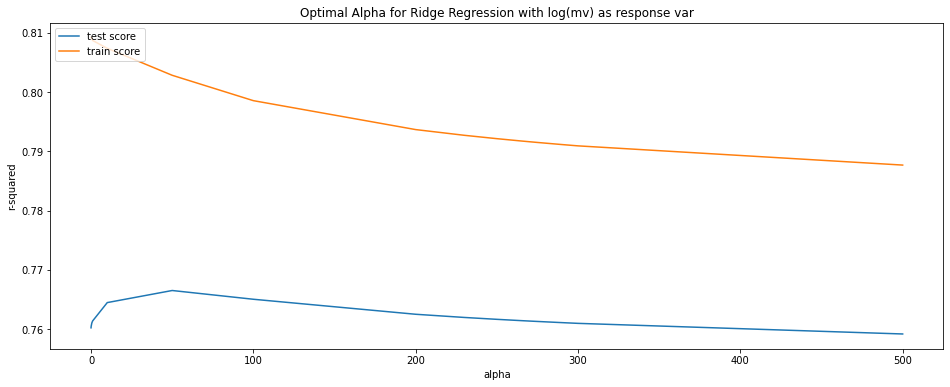

In [55]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('alpha')
plt.ylabel('r-squared')
plt.title("Optimal Alpha for Ridge Regression with log(mv) as response var")
plt.legend(['test score', 'train score'], loc='upper left')

In [56]:
print('coefficient of determination - Ridge Regression Model (Training Data + resp var: log(mv)):', model_cv.best_estimator_.score(X_train,y_train))
print('coefficient of determination - Ridge Regression Model (Test Data + resp var: log(mv)):', model_cv.best_estimator_.score(X_test,y_test))

coefficient of determination - Ridge Regression Model (Training Data + resp var: log(mv)): 0.79890980876549
coefficient of determination - Ridge Regression Model (Test Data + resp var: log(mv)): 0.49071484522433295


In [57]:
print('Best Ridge model (response var: log(mv)): ')
model_cv.best_estimator_


Best Ridge model (response var: log(mv)): 


Ridge(alpha=50)

In [58]:
print('RMSE values using best Ridge Regression model (Response var: log(mv)): ')
#use the best model to compute RMSE using CV design
ridge_reg = model_cv.best_estimator_ ## Best Ridge model 

ridge_reg_scores  = cross_val_score(ridge_reg, X, y, scoring=('neg_mean_squared_error'), cv=folds)
ridge_rmse_scores = np.sqrt(-ridge_reg_scores)
ridge_rmse_scores

RMSE values using best Ridge Regression model (Response var: log(mv)): 


array([0.28305005, 0.25603788, 0.29311765])

In [59]:
ridge_reg.intercept_

array([3.94372917])

In [60]:
ridge_reg.coef_

array([[-4.16050550e-02, -3.32626853e-03,  1.99512602e-06,
        -4.84300862e-05,  1.38726591e-02, -7.42611903e-03,
        -1.09874851e-01,  6.00339692e-03, -1.74054276e-02,
         8.60601344e-03, -9.75376789e-05, -1.78659723e-02]])

In [61]:
###################################################
#  Lasso Regression -- Response Variable: log(mv) #
##################################################

# using cross validation design
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

hyper_params = [{'alpha': [0.01,0.02, 0.024, 0.025, 0.026, 0.03,0.05,0.1,0.5,1.0,10,20,50,100]}]
model = Lasso() 

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.4s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.006243,0.001109,0.011396,0.007778,0.01,{'alpha': 0.01},0.796043,0.743530,0.754773,0.764782,0.022576,1,0.790854,0.810498,0.815700,0.805684,0.010699
1,0.003383,0.000015,0.002613,0.000047,0.02,{'alpha': 0.02},0.797514,0.731119,0.760407,0.763014,0.027168,2,0.786788,0.806747,0.811252,0.801596,0.010631
2,0.003318,0.000096,0.002543,0.000070,0.024,{'alpha': 0.024},0.797320,0.725397,0.761205,0.761308,0.029362,3,0.784372,0.804688,0.808743,0.799268,0.010662
3,0.002512,0.000117,0.001964,0.000067,0.025,{'alpha': 0.025},0.797199,0.723865,0.761264,0.760776,0.029940,4,0.783700,0.804151,0.808071,0.798641,0.010685
4,0.002512,0.000075,0.001942,0.000034,0.026,{'alpha': 0.026},0.797048,0.722315,0.761289,0.760217,0.030519,5,0.782999,0.803590,0.807375,0.797988,0.010711
5,0.002462,0.000043,0.001904,0.000005,0.03,{'alpha': 0.03},0.796152,0.716145,0.761193,0.757830,0.032749,6,0.779926,0.801215,0.804321,0.795154,0.010842
6,0.002706,0.000291,0.002731,0.001146,0.05,{'alpha': 0.05},0.786650,0.713786,0.760982,0.753806,0.030176,7,0.761674,0.799362,0.788346,0.783127,0.015822
7,0.003351,0.000259,0.002531,0.000074,0.1,{'alpha': 0.1},0.786084,0.716575,0.758152,0.753604,0.028559,8,0.756176,0.798510,0.778045,0.777577,0.017286
8,0.002770,0.000309,0.002033,0.000166,0.5,{'alpha': 0.5},0.755930,0.724137,0.753181,0.744416,0.014383,9,0.746272,0.787878,0.769408,0.767853,0.017021
9,0.002403,0.000005,0.001882,0.000018,1,{'alpha': 1.0},0.700020,0.707642,0.733289,0.713651,0.014231,10,0.715322,0.755176,0.742412,0.737637,0.016617


In [62]:
print('coefficient of determination - Lasso Regression Model (Training Data + log(mv)):', model_cv.best_estimator_.score(X_train,y_train))
print('coefficient of determination - Lasso Regression Model (Test Data + log(mv)):', model_cv.best_estimator_.score(X_test,y_test))

coefficient of determination - Lasso Regression Model (Training Data + log(mv)): 0.7997709684914692
coefficient of determination - Lasso Regression Model (Test Data + log(mv)): 0.4949836643925726


In [63]:
print('Best Lasso model (response var: log(mv)): ')
model_cv.best_estimator_

Best Lasso model (response var: log(mv)): 


Lasso(alpha=0.01)

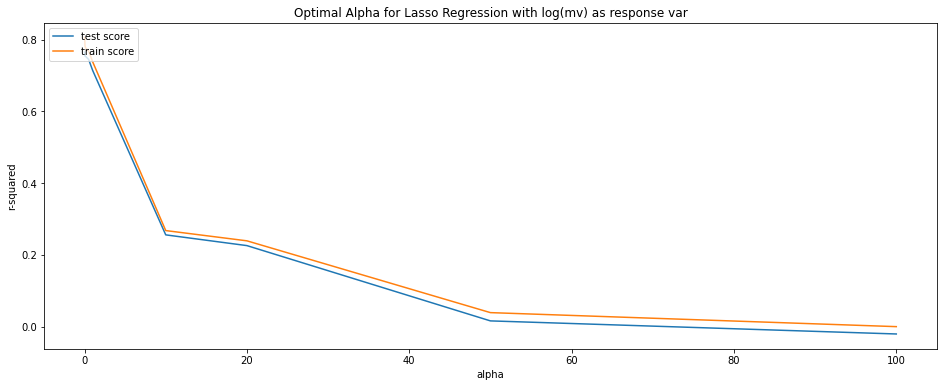

In [64]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('alpha')
plt.ylabel('r-squared')
plt.title("Optimal Alpha for Lasso Regression with log(mv) as response var")
plt.legend(['test score', 'train score'], loc='upper left')

In [65]:
print('RMSE values using best Lasso Regression model (Response var: log(mv)): ')
#use the best model to compute RMSE using CV design
lasso_reg = model_cv.best_estimator_ ## Best Ridge model

lasso_reg_scores  = cross_val_score(lasso_reg, X, y, scoring=('neg_mean_squared_error'), cv=folds)
lasso_rmse_scores = np.sqrt(-lasso_reg_scores)
lasso_rmse_scores

RMSE values using best Lasso Regression model (Response var: log(mv)): 


array([0.28128405, 0.25627855, 0.29150955])

In [67]:
for coef, col in enumerate(X_train.columns):
    print(f'{col}:  {lasso_reg.coef_[coef]}')

crim:  -0.03985348361123779
zn:  -0.0028118612690377254
indus:  -6.287713905614492e-05
chas:  0.0
nox:  0.0
rooms:  -0.0
age:  -0.1311151355758115
dis:  0.006239029084875238
rad:  -0.011631163944947473
tax:  0.007512885929835017
ptratio:  -4.867848260210709e-05
lstat:  -0.015376593534469355


In [66]:
lasso_reg.intercept_

array([3.93913206])

In [68]:
lin_reg_r2_scores  = cross_val_score(lin_reg, X, y, scoring=('r2'), cv=folds)
lin_reg_r2_scores


array([0.77729905, 0.81190475, 0.77555833])

In [69]:
ridge_reg_r2_scores  = cross_val_score(ridge_reg, X, y, scoring=('r2'), cv=folds)
ridge_reg_r2_scores

array([0.76766168, 0.81932083, 0.7640029 ])

In [70]:
lasso_reg_r2_scores  = cross_val_score(lasso_reg, X, y, scoring=('r2'), cv=folds)
lasso_reg_r2_scores

array([0.77055184, 0.81898099, 0.76658526])